### Project 2 - Perform Facial Recognition with Deep Learning in Keras Using CNN

# 1. Import the requried libraries

In [1]:
import numpy as np
import seaborn as sns
from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback

from matplotlib import pyplot as plt

import tensorflow as tf
print(tf.__version__)

2.5.0


# 2. Load the dataset and normalize the images

In [2]:
data_files = np.load('ORL_faces.npz')
list_files = data_files.files
for file in list_files:
    print(file, data_files[file].shape)

testY (160,)
testX (160, 10304)
trainX (240, 10304)
trainY (240,)


In [3]:
image_x_train = data_files['trainX']
image_x_train

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [4]:
image_x_train_norm = image_x_train.astype(float) / 255
image_x_train_norm

array([[0.18823529, 0.19215686, 0.17647059, ..., 0.18431373, 0.18039216,
        0.18039216],
       [0.23529412, 0.23529412, 0.24313725, ..., 0.1254902 , 0.13333333,
        0.13333333],
       [0.15294118, 0.17254902, 0.20784314, ..., 0.11372549, 0.10196078,
        0.11372549],
       ...,
       [0.44705882, 0.45882353, 0.44705882, ..., 0.38431373, 0.37647059,
        0.38431373],
       [0.41176471, 0.41176471, 0.41960784, ..., 0.21176471, 0.18431373,
        0.16078431],
       [0.45490196, 0.44705882, 0.45882353, ..., 0.37254902, 0.39215686,
        0.39607843]])

In [5]:
image_x_test = data_files['testX']
image_x_test

array([[ 41.,  47.,  47., ...,  35.,  37.,  38.],
       [ 44.,  43.,  32., ...,  43.,  43.,  37.],
       [ 42.,  41.,  44., ...,  42.,  43.,  41.],
       ...,
       [101., 100., 103., ...,  31.,  40.,  42.],
       [105., 108., 106., ...,  44.,  40.,  47.],
       [113., 114., 111., ...,  62.,  81.,  89.]])

In [6]:
image_x_test_norm = image_x_test.astype(float) / 255
image_x_test_norm

array([[0.16078431, 0.18431373, 0.18431373, ..., 0.1372549 , 0.14509804,
        0.14901961],
       [0.17254902, 0.16862745, 0.1254902 , ..., 0.16862745, 0.16862745,
        0.14509804],
       [0.16470588, 0.16078431, 0.17254902, ..., 0.16470588, 0.16862745,
        0.16078431],
       ...,
       [0.39607843, 0.39215686, 0.40392157, ..., 0.12156863, 0.15686275,
        0.16470588],
       [0.41176471, 0.42352941, 0.41568627, ..., 0.17254902, 0.15686275,
        0.18431373],
       [0.44313725, 0.44705882, 0.43529412, ..., 0.24313725, 0.31764706,
        0.34901961]])

In [7]:
label_y_train = to_categorical(data_files['trainY'])
label_y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
label_y_test = to_categorical(data_files['testY'])
label_y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# 3. Split the dataset

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(image_x_train_norm, label_y_train, test_size=0.2, random_state=123)
x_train.shape

(192, 10304)

In [10]:
y_train.shape

(192, 20)

In [11]:
x_valid.shape

(48, 10304)

In [12]:
y_valid.shape

(48, 20)

# 4. Transform the images to equal sizes to feed in CNN

In [13]:
int_col = 112
int_row = 92
x_train = x_train.reshape(len(x_train), int_col, int_row, 1)
x_train.shape

(192, 112, 92, 1)

In [14]:
x_valid = x_valid.reshape(len(x_valid), int_col, int_row, 1)
x_valid.shape

(48, 112, 92, 1)

In [15]:
x_test = image_x_test_norm
x_test = x_test.reshape(len(x_test), int_col, int_row, 1)
x_test.shape

(160, 112, 92, 1)

# 5. Build a CNN model that has 3 main layers

In [16]:
model_cnn = Sequential()

# i. Convolutional Layer
model_cnn.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (int_col, int_row, 1)))

# ii. Pooling Layer
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Flatten())

# iii. Fully Connected Layer
model_cnn.add(Dense(512, activation = 'relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dropout(0.25))

model_cnn.add(Dense(20, activation='softmax'))

# 6. Train the model

In [17]:
model_cnn.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 90, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 45, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 79200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               40550912  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [18]:
int_batch_size = 32
history = model_cnn.fit(x = x_train, y = y_train,
                        validation_data = (x_valid, y_valid),
                        epochs = 100,
                        batch_size = int_batch_size)

Epoch 1/100
6/6 [==============================] - 3s 425ms/step - loss: 7.6985 - accuracy: 0.0469 - val_loss: 4.1479 - val_accuracy: 0.1042
Epoch 2/100
6/6 [==============================] - 2s 385ms/step - loss: 4.7399 - accuracy: 0.0521 - val_loss: 3.0028 - val_accuracy: 0.0833
Epoch 3/100
6/6 [==============================] - 2s 399ms/step - loss: 3.1221 - accuracy: 0.0990 - val_loss: 2.8739 - val_accuracy: 0.0625
Epoch 4/100
6/6 [==============================] - 2s 402ms/step - loss: 2.8803 - accuracy: 0.1042 - val_loss: 2.7927 - val_accuracy: 0.1667
Epoch 5/100
6/6 [==============================] - 2s 389ms/step - loss: 2.7236 - accuracy: 0.1979 - val_loss: 2.6738 - val_accuracy: 0.2292
Epoch 6/100
6/6 [==============================] - 2s 409ms/step - loss: 2.5904 - accuracy: 0.2552 - val_loss: 2.5112 - val_accuracy: 0.4583
Epoch 7/100
6/6 [==============================] - 2s 402ms/step - loss: 2.3860 - accuracy: 0.3646 - val_loss: 2.3792 - val_accuracy: 0.2292
Epoch 8/100
6

Epoch 59/100
6/6 [==============================] - 2s 399ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 60/100
6/6 [==============================] - 2s 404ms/step - loss: 0.0376 - accuracy: 0.9896 - val_loss: 0.1049 - val_accuracy: 0.9583
Epoch 61/100
6/6 [==============================] - 2s 397ms/step - loss: 0.0343 - accuracy: 0.9948 - val_loss: 0.1040 - val_accuracy: 0.9583
Epoch 62/100
6/6 [==============================] - 2s 398ms/step - loss: 0.0197 - accuracy: 0.9948 - val_loss: 0.0994 - val_accuracy: 0.9583
Epoch 63/100
6/6 [==============================] - 2s 404ms/step - loss: 0.0379 - accuracy: 0.9844 - val_loss: 0.0769 - val_accuracy: 0.9583
Epoch 64/100
6/6 [==============================] - 2s 421ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0677 - val_accuracy: 0.9583
Epoch 65/100
6/6 [==============================] - 2s 400ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9583
Epoch 

In [19]:
# Check the accuracy using the test dataset
cnn_eval = model_cnn.evaluate(x_test, label_y_test)
print("[Loss, Accuracy]:", cnn_eval)

5/5 [==============================] - 1s 87ms/step - loss: 0.2152 - accuracy: 0.9375
[Loss, Accuracy]: [0.21521611511707306, 0.9375]


# 7. Plot the result

In [20]:
label_y_predict = model_cnn.predict(x_test).round(0)
print("Confusion metrics accurracy:", accuracy_score(label_y_test, label_y_predict))

Confusion metrics accurracy: 0.925


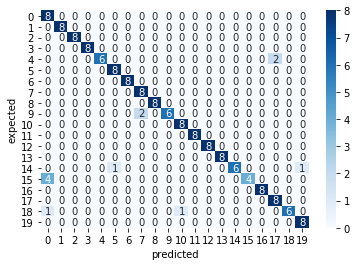

In [21]:
mx_confusion = confusion_matrix(label_y_test.argmax(axis=1), label_y_predict.argmax(axis=1))
df_confusion = DataFrame(mx_confusion)
sns.heatmap(df_confusion, cmap='Blues', annot=True)
plt.ylabel('expected')
plt.xlabel('predicted')
plt.show()

# 8. Iterate the model until the accuracy is above 90%

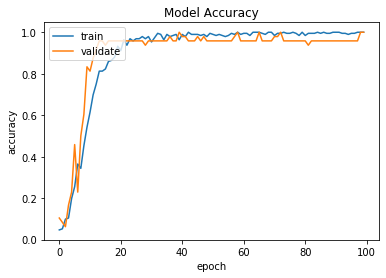

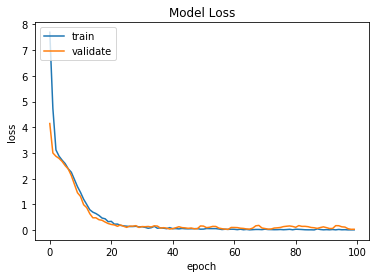

In [22]:
# Plot the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

# Plot the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

The graphs are suggsting that 90% accuracy could be achieved with around 30 epochs.

In [23]:
# Define callback function to stop the iteration when accuracy is above 90%
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Accuracy >= 90%
class QualityThreshold(Callback):
  def __init__(self, cl):
    super(QualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']

    if (testScore > trainScore and trainScore >= self.cl and epoch > 5) or (testScore == 1 and epoch > 5):
      self.model.stop_training = True

In [24]:
model_new = Sequential()

# i. Convolutional Layer
model_new.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (int_col, int_row, 1)))

# ii. Pooling Layer
model_new.add(MaxPooling2D(pool_size = (2,2)))
model_new.add(Flatten())

# iii. Fully Connected Layer
model_new.add(Dense(512, activation = 'relu'))
model_new.add(Dropout(0.25))
model_new.add(Dense(128, activation = 'relu'))
model_new.add(Dropout(0.25))
model_new.add(Dense(20, activation='softmax'))

model_new.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_new.fit(x = x_train, y = y_train,
              validation_data = (x_valid, y_valid),
              epochs = 100,
              batch_size = int_batch_size,
              callbacks=[QualityThreshold(0.9)])

Epoch 1/100
6/6 [==============================] - 3s 440ms/step - loss: 8.2351 - accuracy: 0.0625 - val_loss: 4.3020 - val_accuracy: 0.0208
Epoch 2/100
6/6 [==============================] - 2s 404ms/step - loss: 4.8794 - accuracy: 0.0469 - val_loss: 3.1002 - val_accuracy: 0.0417
Epoch 3/100
6/6 [==============================] - 2s 401ms/step - loss: 3.4077 - accuracy: 0.1250 - val_loss: 2.9615 - val_accuracy: 0.1458
Epoch 4/100
6/6 [==============================] - 2s 401ms/step - loss: 3.0374 - accuracy: 0.0938 - val_loss: 2.9444 - val_accuracy: 0.1667
Epoch 5/100
6/6 [==============================] - 2s 397ms/step - loss: 2.9131 - accuracy: 0.0573 - val_loss: 2.8185 - val_accuracy: 0.2917
Epoch 6/100
6/6 [==============================] - 2s 403ms/step - loss: 2.7375 - accuracy: 0.1979 - val_loss: 2.6536 - val_accuracy: 0.2500
Epoch 7/100
6/6 [==============================] - 2s 403ms/step - loss: 2.5970 - accuracy: 0.2552 - val_loss: 2.3981 - val_accuracy: 0.3750
Epoch 8/100
6

In [26]:
# Check the accuracy using the test dataset
new_eval = model_new.evaluate(x_test, label_y_test)
print("[Loss, Accuracy]:", new_eval)

5/5 [==============================] - 1s 87ms/step - loss: 0.4714 - accuracy: 0.9187
[Loss, Accuracy]: [0.47139424085617065, 0.918749988079071]


As oberved, with around 20 epochs it is able to achieve 90% accuracy and the similar accuracy is also achieved on test dataset.